# 7 Multivariate plotting

In this tutorial we will learn three multivariate data visualization techniques.

1. Faceting
2. Adding more visual variables, results in more complicated but potentially more detailed plots.
3. Summarization, compresses variable information to a summary statistic, resulting in a simple output—albeit at the cost of expressiveness.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
root_path="https://minio.lab.sspcloud.fr/pengfei/diffusion/data_viz"
footballer_input_file=f'{root_path}/footballer.csv'

In [3]:
df=pd.read_csv(footballer_input_file,index_col=0,encoding='utf8')

/tmp/ipykernel_3166/4024723477.py:1: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(footballer_input_file,index_col=0,encoding='utf8')


In [4]:
print(df['Value'].head(5))

0    €95.5M
1     €105M
2     €123M
3      €97M
4      €61M
Name: Value, dtype: object


## 7.1 Clean the value column

break the Value column(€95.5M) into two columns, Unit column can be M (million) or 0
The Value (M) column represents the player's value in Million,
examples:
€95.5M -> M, 95.5
€0 -> 0, 0

In [5]:
footballers= df.copy()
footballers['Unit'] = df['Value'].str[-1]
footballers['Value (M)'] = np.where(footballers['Unit'] == '0', 0,
                                    footballers['Value'].str[1:-1].replace(r'[a-zA-Z]',''))
#print(footballers[footballers['Unit']=='0']['Value'].head(5))
footballers['Value (M)'] = footballers['Value (M)'].astype(float)
footballers['Value (M)'] = np.where(footballers['Unit'] == 'M',
                                    footballers['Value (M)'],
                                    footballers['Value (M)']/1000)

In [6]:
# replace the old value column by Value (M) column
# replace the old position column by the first element in Preferred Position
footballers = footballers.assign(Value=footballers['Value (M)'],
                                 Position=footballers['Preferred Positions'].str.split().str[0])


In [7]:
print(f"footballers has millions in values:\n {footballers[footballers['Unit']=='M']['Value (M)'].head(5)}")
print(f"footballers has nothing in values:\n {footballers[footballers['Unit']=='0']['Value (M)'].head(5)}")

footballers has millions in values:
 0     95.5
1    105.0
2    123.0
3     97.0
4     61.0
Name: Value (M), dtype: float64
footballers has nothing in values:
 162    0.0
167    0.0
274    0.0
472    0.0
488    0.0
Name: Value (M), dtype: float64


In [9]:
print(footballers['Unit'].head(5))

print(footballers.head())

0    M
1    M
2    M
3    M
4    M
Name: Unit, dtype: object
                Name  Age                                            Photo  \
0  Cristiano Ronaldo   32   https://cdn.sofifa.org/48/18/players/20801.png   
1           L. Messi   30  https://cdn.sofifa.org/48/18/players/158023.png   
2             Neymar   25  https://cdn.sofifa.org/48/18/players/190871.png   
3          L. Suárez   30  https://cdn.sofifa.org/48/18/players/176580.png   
4           M. Neuer   31  https://cdn.sofifa.org/48/18/players/167495.png   

  Nationality                                 Flag  Overall  Potential  \
0    Portugal  https://cdn.sofifa.org/flags/38.png       94         94   
1   Argentina  https://cdn.sofifa.org/flags/52.png       93         93   
2      Brazil  https://cdn.sofifa.org/flags/54.png       92         94   
3     Uruguay  https://cdn.sofifa.org/flags/60.png       92         92   
4     Germany  https://cdn.sofifa.org/flags/21.png       92         92   

                  Club   

Adding more visual variables

The most obvious way to plot lots of variables is to augment the visualizations we've been using thus far with even more visual variables. A visual variable is any visual dimension or marker that we can use to perceptually distinguish two data elements from one another. Examples include size, color, shape, and one, two, and even three-dimensional position.

"Good" multivariate data displays are ones that make efficient, easily-interpretable use of these parameters.


## 7.2 Multivariate scatter plots

Let's look at some examples. We'll start with the scatter plot. Supose that we are interested in seeing which
type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger.


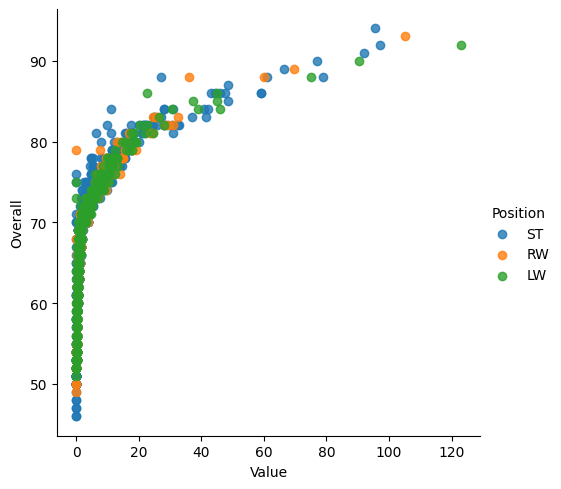

In [10]:
# use color for hue distinction, the default setting
sns.lmplot(x='Value',y='Overall',hue='Position',data=footballers.loc[footballers['Position'].isin(['ST','RW','LW'])],fit_reg=False)
plt.show()


This scatterplot uses three visual variables. The horizontal position (x-value) tracks the Value of the player
(how well they are paid). The vertical position (y-value) tracks the Overall score of the player across all attributes.
And the color (the hue parameter) tracks which of the three categories of interest the player the point represents is in.

The new variable in this chart is color. Color provides an aesthetically pleasing visual, but it's tricky to use.
Looking at this scatter plot we see the same overplotting issue we saw in previous sections. But we no longer have an
easy solution, like using a hex plot, because color doesn't make sense in that setting.

Another example visual variable is shape. Shape controls, well, the shape of the marker:

use shape for hue distinction, use markers to specifies which marker for which position: o-> ST, x->RW, *->LW


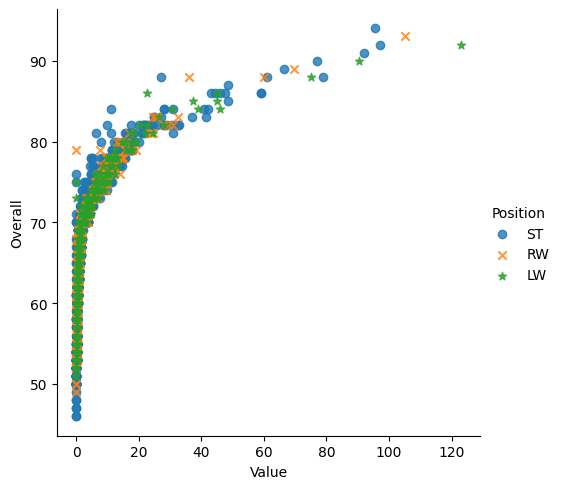

In [11]:
sns.lmplot(x='Value', y='Overall', markers=['o', 'x', '*'], hue='Position',
           data=footballers.loc[footballers['Position'].isin(['ST', 'RW', 'LW'])],
           fit_reg=False
          )

plt.show()

## 7.3 Groupe box plot

Another demonstrative plot is the grouped box plot. This plot takes advantage of grouping.
Suppose we're interested in the following question: do Strikers score higher on "Aggression" than Goalkeepers do?

In [12]:
# we filter the data set with only ST and GK
# we keep only 4 columns
f = (footballers
          .loc[footballers['Position'].isin(['ST', 'GK'])]
          .loc[:, ['Value', 'Overall', 'Aggression', 'Position']]
     )
print(f.head(5))

   Value  Overall Aggression Position
0   95.5       94         63       ST
3   97.0       92         78       ST
4   61.0       92         29       GK
5   92.0       91         80       ST
6   64.5       90         38       GK


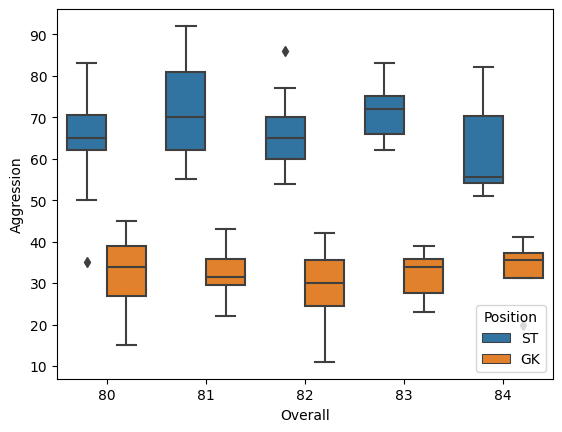

In [13]:
# we filter the data set with only overall score between 80 and 85
f = f[f["Overall"] >= 80]
f = f[f["Overall"] < 85]
f['Aggression'] = f['Aggression'].astype(float)
#
sns.boxplot(x="Overall", y="Aggression", hue='Position', data=f)
plt.show()

As you can see, this plot demonstrates conclusively that within our datasets goalkeepers (at least, those with an
overall score between 80 and 85) have much lower Aggression scores than Strikers do.

In this plot, the horizontal axis encodes the Overall score, the vertical axis encodes the Aggression score, and the
grouping encodes the Position.

Grouping is an extremely communicative visual variable: it makes this chart very easy to interpret. However, it
has very low cardinality: it's very hard to use groups to fit more than a handful of categorical values. In this
plot we've chosen just two player positions and five Overall player scores and the visualization is already rather
crowded. Overall, grouping is very similar to faceting in terms of what it can and can't do.

## 7.4 Summarization

It is difficult to squeeze enough dimensions onto a plot without hurting its interpretability. Very busy plots are naturally very hard to interpret. Hence highly multivariate can be difficult to use.

Another way to plot many dataset features while circumnavigating this problem is to use summarization. Summarization is the creation and addition of new variables by mixing and matching the information provided in the old ones.

Summarization is a useful technique in data visualization because it allows us to "boil down" potentially very complicated relationships into simpler ones.

## 7.5 Heatmap

1.filter the data set with only five columns (e.g. 'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control').
2. Use applymap to convert all cell values from string to int, if can't convert, put null instead lambda v is a function declared by using a lambda operator
3. drop all null cell
4. do the correlation

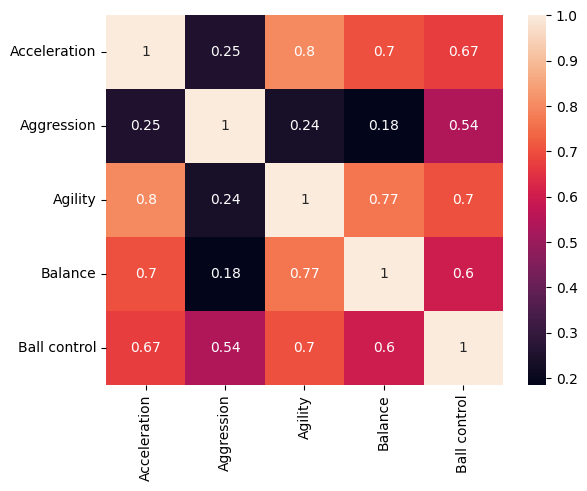

In [14]:
from tutorials.utils import isDecimal

f = (
    footballers.loc[:, ['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control']]
        .applymap(lambda v: int(v) if isDecimal(v) else np.nan)
        .dropna()
).corr()

# generate the heat map
sns.heatmap(f, annot=True)
plt.show()

Each cell in this plot is the intersection of two variables; its color and label together indicate the amount of correlation between the two variables (how likely both variables are the increase or decrease at the same time).

For example, in this dataset Agility and Acceleration are highly correlated, while Aggression and Balanced are very uncorrelated.

A correlation plot is a specific kind of heatmap. A heatmap maps one particular fact (in this case, correlation) about every pair of variables you chose from a dataset.

The number of correlation is between 0 and 1, 1 means perfect correlated, 0 means not correlated at all.


## 7.6 Parallel Coordinates

A parallel coordinates plot provides another way of visualizing data across many variables.

1. we slice the column between position 12 and 17 (e.g. Acceleration, Aggression, Agility, Balance Ball control)
2. we filter the data set where position is ST or GK
3. convert all cell value into int, if can't replace by null
4. drop all null cell


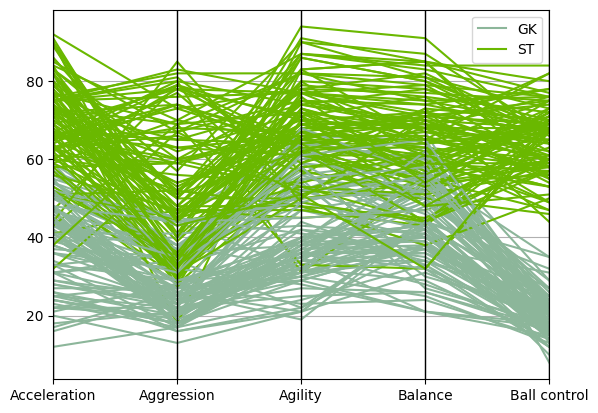

In [22]:
from pandas.plotting import parallel_coordinates

f = (
    footballers.iloc[:, 12:17]
        .loc[footballers['Position'].isin(['ST', 'GK'])]
        .applymap(lambda v: int(v) if isDecimal(v) else np.nan)
        .dropna()
)
f['Position'] = footballers['Position']
f = f.sample(200)

parallel_coordinates(f, 'Position')

plt.show()

In the visualization above we've plotted a sample of 200 goalkeepers (in dark green) and strikers (in light green) across our five variables of interest.

Parallel coordinates plots are great for determining how distinguishable different classes are in the data.

They standardize the variables from top to bottom... In this case, we see that strikers are almost uniformly higher rated on all the variables we've chosen, meaning these two classes of players are very easy to distinguish.


## 7.7 Pokemon Exercises

### Question 1. What are three techniques for creating multivariate data visualizations?
- multivariate scatter plot
- grouped box plot
- heatmap
- parallel coordinates

The three techniques we have covered in this tutorial are faceting, using more visual variables, and summarization

### Question 2 Name three examples of visual variables.
Some examples of visual variables are shape, color, size, x-position, y-position, and grouping. However, there are many more that are possible!

### Question 3 How does summarization in data visualization work?
In data visualization, summarization works by compressing complex data into simpler, easier-to-plot indicators.


In [24]:
pokemon_input_file=f'{root_path}/Pokemon.csv'
pokemon=pd.read_csv(pokemon_input_file,index_col=0)

### Q4 create a multivariate scatter plot with x= attack, y= defense, hue=legendary


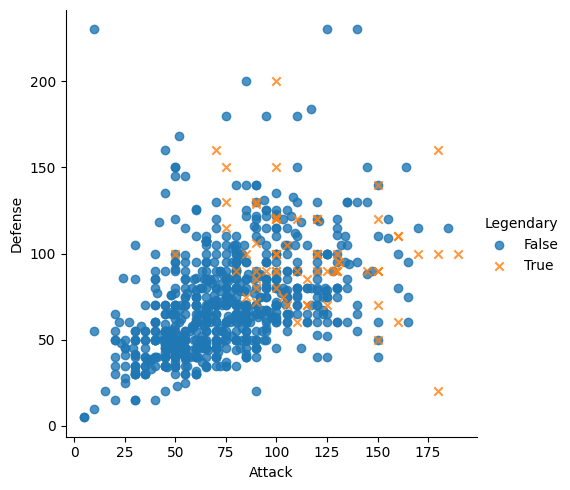

In [25]:
sns.lmplot(x='Attack', y='Defense', markers=['o', 'x'], hue='Legendary',
              data=pokemon,fit_reg=False
          )

plt.show()

### Q5 create a grouped box plot, with x= generation, y= total, hue=legendary


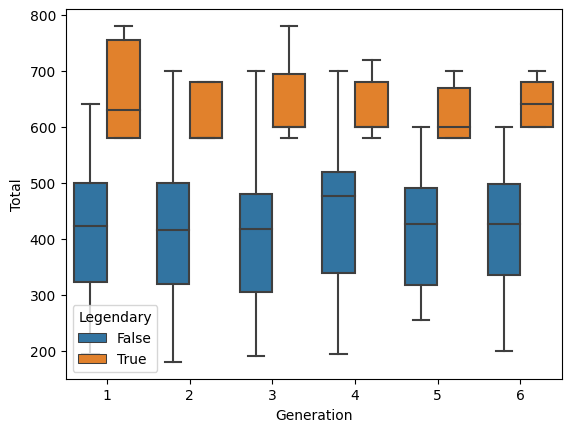

In [26]:
sns.boxplot(x='Generation',y='Total', hue='Legendary',data=pokemon)
plt.show()

# Q3 create a heatmap with HP,Attack, Sp. Atk, Defense, Sp. Def, speed


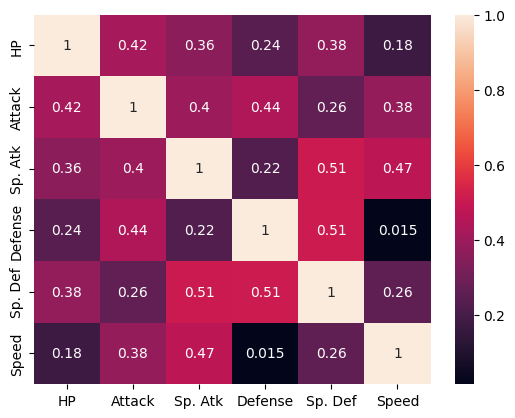

In [27]:
f = (
    pokemon.loc[:,['HP', 'Attack', 'Sp. Atk', 'Defense', 'Sp. Def', 'Speed']]
            .applymap(lambda v: int(v) if isDecimal(v) else np.nan)
            .dropna()
).corr()

sns.heatmap(data=f,annot=True)
plt.show()

# Q4 create a parallel coordinates with pokemon type in Fighting, Psychic


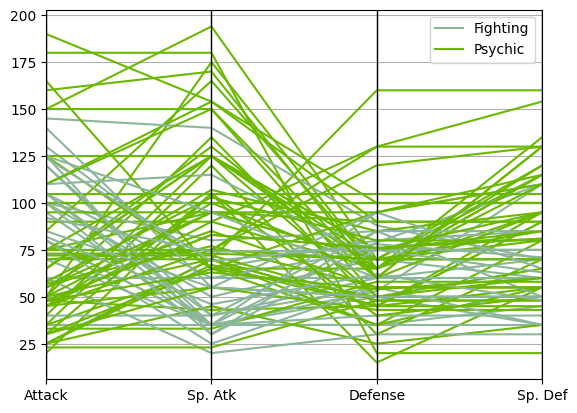

In [28]:
f = (pokemon[pokemon['Type 1'].isin(["Psychic","Fighting"])]
        .loc[:, ['Type 1', 'Attack', 'Sp. Atk', 'Defense', 'Sp. Def']]
)

parallel_coordinates(f, 'Type 1')
plt.show()

## Appendix

### pandas loc vs iloc

1. loc gets rows (or columns) with particular labels from the index.
2. iloc gets rows (or columns) at particular positions in the index (so it only takes integers).

Below is a simple example

In [15]:
s = pd.Series(np.nan, index=[49,48,47,46,45, 1, 2, 3, 4, 5])

In [16]:
print(s)

49   NaN
48   NaN
47   NaN
46   NaN
45   NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
dtype: float64


In [17]:
# slice from the beginning to three rows, so 3 is not the index of the row, it's the position in the row
s.iloc[:3]

49   NaN
48   NaN
47   NaN
dtype: float64

In [18]:
# slice up to and including label 3, so 3 is the index of the row
s.loc[:3]

49   NaN
48   NaN
47   NaN
46   NaN
45   NaN
1    NaN
2    NaN
3    NaN
dtype: float64

In [19]:
# This works because s has 10 items in total
s.iloc[:6]

49   NaN
48   NaN
47   NaN
46   NaN
45   NaN
1    NaN
dtype: float64

In [21]:
# This does not work, because no index 6 in the dataframe
s.loc[:6]

KeyError: 6